# 单价因子是看房子单价对保值程度的影响。首先，我将所有小区按照2014全年的成交均价分成多层，然后分别看各层次小区近年来的走势

In [1]:
from common import read
df = read('北京')

/Users/alex/Quant/code/LianjiaSpider/common.py:90: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df = pd.concat(dfs)


raw count: 689119
count after drop duplicates 555179
count after drop less than 1000 554554
count after drop 40, 50 535391


In [2]:
import pandas as pd
import numpy as np
df2014 = df.loc[df['成交时间']<'2015-01-01']
df2014 = df2014.loc[df2014['成交时间']>='2014-01-01']
price = df2014.groupby('小区')['成交价(元/平)'].mean()
gp = price.groupby(pd.cut(price, price.quantile(np.arange(0, 1.01, 0.25))))

In [3]:
df2014a = df.loc[df['成交时间']>'2015-01-01']
items = list(gp.groups.items())
dfs = [df2014a.loc[df2014a['小区'].isin(item[1])] for item in items]
legends = [str(item[0]) for item in items]
legends

['(5112.0, 30345.0]',
 '(30345.0, 39647.757]',
 '(39647.757, 50227.222]',
 '(50227.222, 139695.0]']

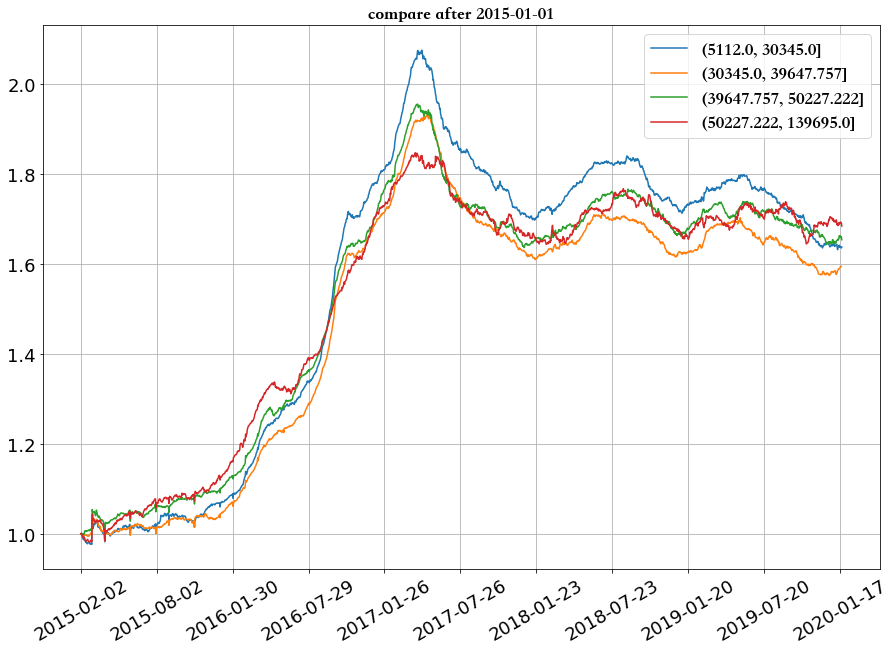

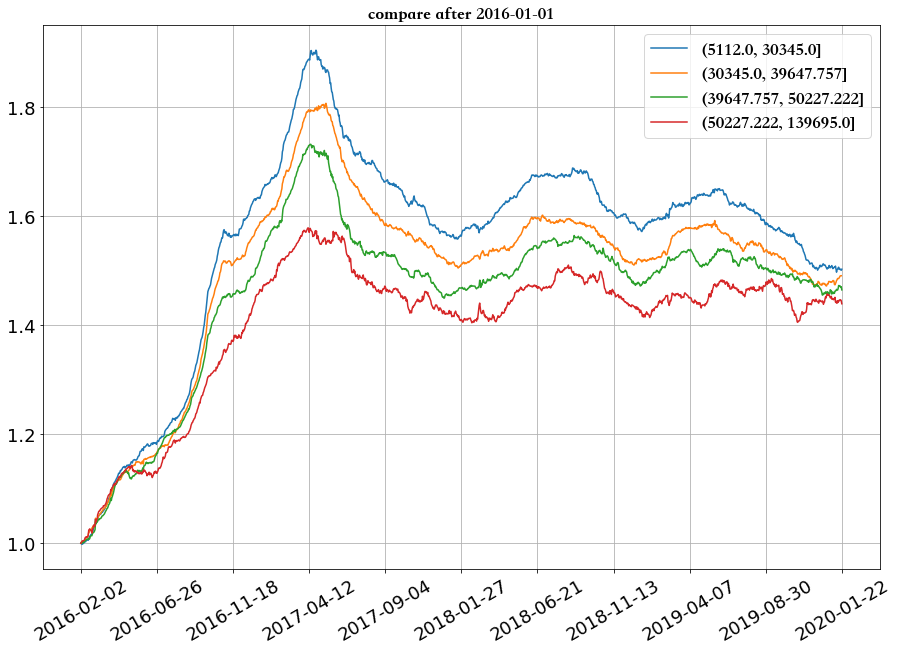

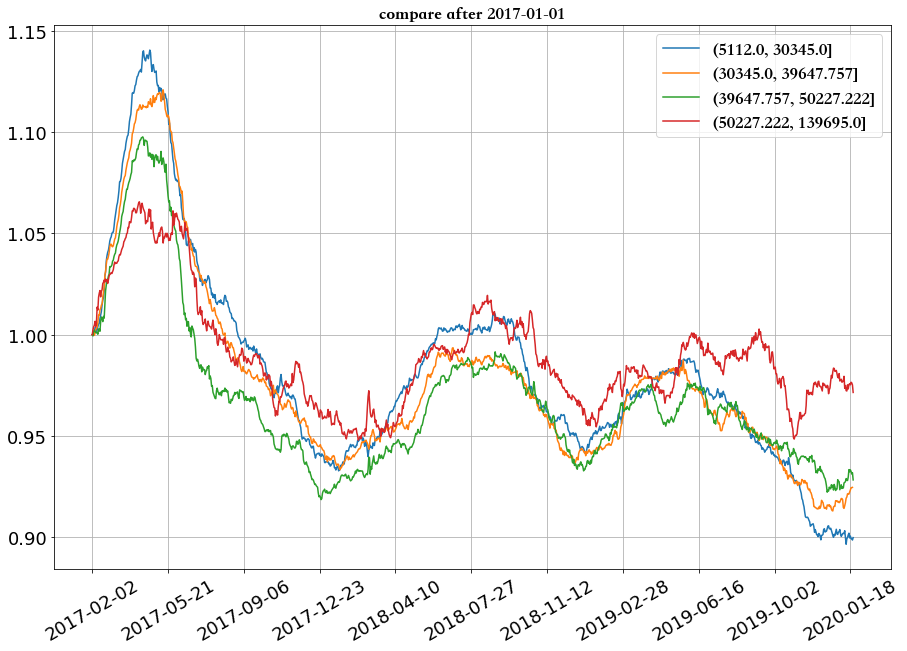

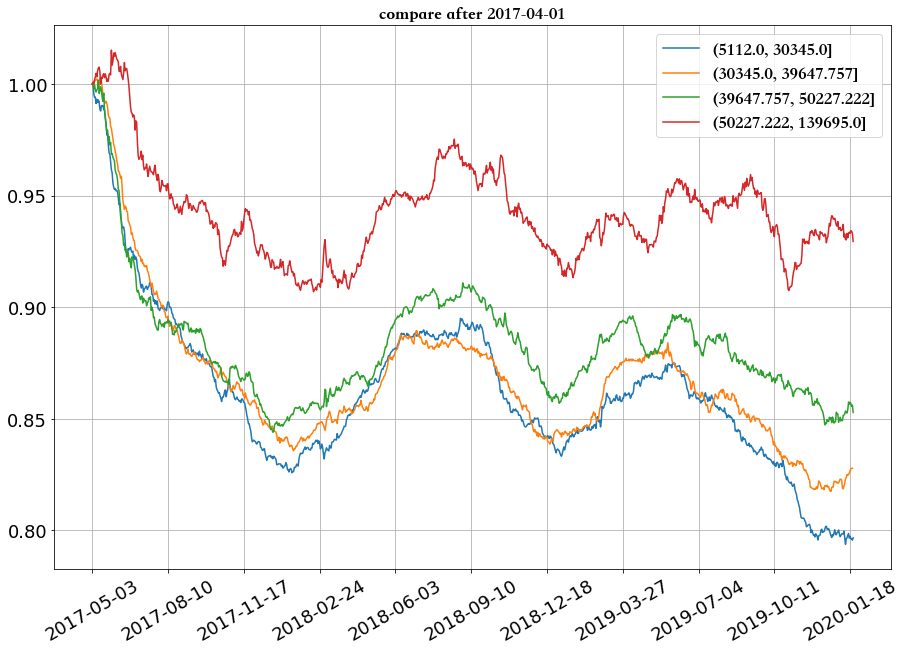

In [6]:
from common import plot_dfs
for start_date in ['2015-01-01', '2016-01-01', '2017-01-01', '2017-04-01']:
    df2014a = df.loc[df['成交时间']>start_date]
    items = list(gp.groups.items())
    dfs = [df2014a.loc[df2014a['小区'].isin(item[1])] for item in items]
    legends = [str(item[0]) for item in items]
    legends
    plot_dfs(dfs, 'compare after %s'%start_date, legends)